In [3]:
import numpy as np

In [4]:
gp = np.array([8, 3, 1, 11, 4, 7])

In [5]:
gp

array([ 8,  3,  1, 11,  4,  7])

In [6]:
gp.mean()

5.666666666666667

In [7]:
mean = gp.mean()
mean

5.666666666666667

In [8]:
gp.var()

11.222222222222221

In [9]:
N = len(gp)
N

6

In [10]:
v = 0
for i in gp:
    v = v + (i - mean) ** 2
v

67.33333333333333

In [11]:
v = v / N
v

11.222222222222221

In [21]:
# Sample variance
S2 = gp.var(ddof=1)
S2

13.466666666666665

In [13]:
v = 0
for i in gp:
    v = v + (i - mean) ** 2
v = v / (N - 1)
v

13.466666666666665

In [14]:
gp.std()

3.34995854037363

In [15]:
np.sqrt(4)

2.0

In [16]:
np.sqrt(gp.var())

3.34995854037363

In [20]:
S = gp.std(ddof=1)
S

3.669695718539436

In [18]:
np.sqrt(gp.var(ddof=1))

3.669695718539436

# Выборки объема 3 

In [22]:
n = 3

In [23]:
from itertools import combinations

In [25]:
gp

array([ 8,  3,  1, 11,  4,  7])

In [28]:
print("General Population mean", mean)
sample_means = []
for i in combinations(gp, n):
    sample = np.array(i)
    sample_means.append(sample.mean())
sample_means = np.array(sample_means)
sample_means

General Population mean 5.666666666666667


array([4.        , 7.33333333, 5.        , 6.        , 6.66666667,
       4.33333333, 5.33333333, 7.66666667, 8.66666667, 6.33333333,
       5.        , 2.66666667, 3.66666667, 6.        , 7.        ,
       4.66666667, 5.33333333, 6.33333333, 4.        , 7.33333333])

In [29]:
sample_means.mean()

5.666666666666666

In [30]:
mean

5.666666666666667

## Проверить, что s2 есть несмещенная оценая S2, а sigma2_sample есть смещенная оценка sigma2

# Стандартные ошибки и доверительные интервалы

In [37]:
sample = np.random.poisson(2, 35)
print(sample)
sample = sample[sample > 0]
sample

[1 2 2 4 3 4 2 2 2 2 1 1 0 2 3 2 2 2 4 2 2 2 2 3 2 0 0 2 2 0 0 1 2 4 3]


array([1, 2, 2, 4, 3, 4, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2,
       3, 2, 2, 2, 1, 2, 4, 3])

In [38]:
n = len(sample)
N = 14848
n, N

(30, 14848)

Дано: количество людей в домах

В выборке n домов

В ГС (микрорайон) N домов

Вопрос: оценить суммарное количество людей, проживающих в микрорайоне и построить 80% доверителньый интервал.


In [40]:
sample_mean = sample.mean()
sample_mean

2.2666666666666666

In [41]:
gp_total_est = N * sample_mean
gp_total_est

33655.46666666667

In [42]:
f = n / N
f

0.0020204741379310346

In [43]:
sample_std = sample.std(ddof=1)
sample_std

0.8683449709106095

In [44]:
mean_standard_error = sample_std * np.sqrt(1 - f) / np.sqrt(n)
mean_standard_error

0.15837713477204401

In [45]:
total_standard_error = N * mean_standard_error
total_standard_error

2351.5836970953096

In [46]:
from scipy import stats

In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

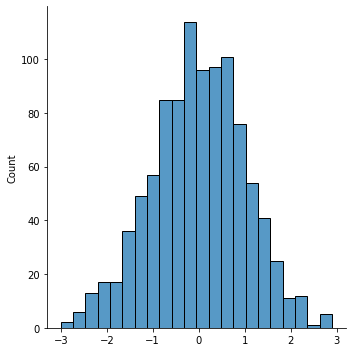

In [57]:
a = stats.norm.rvs(size=1000)
sns.displot(a)

In [65]:
import math
math.factorial(40) / (math.factorial(35) * math.factorial(5))

658008.0

Population mean:  9.879690994041415
Num of samples:  142506
Mean of means:  9.879690994041413


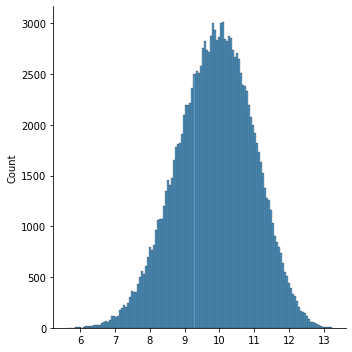

In [66]:
pop = stats.norm.rvs(size=30, loc=10, scale=2)
print("Population mean: ", pop.mean())
s_size = 5
sam_means = []
for i in combinations(pop, s_size):
    sam = np.array(i)
    sam_means.append(sam.mean())
sam_means = np.array(sam_means)
print("Num of samples: ", len(sam_means))
print("Mean of means: ", sam_means.mean())
sns.displot(sam_means)

In [55]:
stats.norm.ppf(0.025)

-1.9599639845400545

80% - ДИ

In [58]:
alpha = 0.2

In [62]:
gp_total_est

33655.46666666667

In [61]:
t_left = stats.norm.ppf(alpha / 2) # t_left < 0
t_right = stats.norm.ppf(1 - alpha / 2)

gp_total_CI_left = gp_total_est + t_left * total_standard_error
gp_total_CI_right = gp_total_est + t_right * total_standard_error
print('80%-й доверительный интервал:')
(gp_total_CI_left, gp_total_CI_right)

80%-й доверительный интервал:


(30641.790898145013, 36669.14243518832)

In [ ]:
# df - pandas Data Frame
# df.values - numpy array